<a href="https://colab.research.google.com/github/f5tihyahya/portofolio/blob/main/bmri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#tuning

In [162]:
from IPython.display import clear_output
print("Jumlah epoch:")
berapa_kali = int(input())
clear_output(wait=False)

print("Jumlah unit:")
hidden_size = int(input())
clear_output(wait=False)

print("Jumlah layer:")
num_layers = int(input())
clear_output(wait=False)

print("Learning rate:")
lrs = float(input())
clear_output(wait=False)

print("Dropout:")
dropout = float(input())
clear_output(wait=False)

In [163]:
print(f"Epochs: {berapa_kali}")
print(f"Units: {hidden_size}")
print(f"Layers: {num_layers}")
print(f"Larning rate: {lrs}")
print(f"Dropout {dropout}")

Epochs: 20
Units: 20
Layers: 2
Larning rate: 0.02
Dropout 0.2


In [82]:
import torch
from torch.utils.data import TensorDataset, DataLoader

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset  = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False)


#awal

In [1]:
import pandas as pd
import numpy as np

In [2]:
linkcsv = "https://drive.google.com/file/d/1DO6nc2uoMc1yrjK0W1D0UTTjk_f5k5pC/view?usp=sharing"
linkcsv = 'https://drive.google.com/uc?id=' + linkcsv.split('/')[-2]
bmri = pd.read_csv(linkcsv)

In [3]:
bmri['Date']=pd.to_datetime(bmri['Date'])

In [4]:
bmri.shape

(1201, 6)

In [5]:
bmri.head()

,Date,Open,High,Low,Close,Volume
0,2020-08-18 00:00:00+07:00,2286.725530,2362.633432,2286.725530,2334.167969,115981200
1,2020-08-19 00:00:00+07:00,2343.656627,2372.122092,2305.702674,2315.191162,64511800
2,2020-08-24 00:00:00+07:00,2296.214036,2343.656475,2248.771597,2277.237061,132486400
3,2020-08-25 00:00:00+07:00,2296.214164,2381.610559,2296.214164,2372.122070,132365800
4,2020-08-26 00:00:00+07:00,2372.121976,2410.075928,2343.656512,2410.075928,78703400


In [6]:
bmri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1201 entries, 0 to 1200
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype                    
---  ------  --------------  -----                    
 0   Date    1201 non-null   datetime64[ns, UTC+07:00]
 1   Open    1201 non-null   float64                  
 2   High    1201 non-null   float64                  
 3   Low     1201 non-null   float64                  
 4   Close   1201 non-null   float64                  
 5   Volume  1201 non-null   int64                    
dtypes: datetime64[ns, UTC+07:00](1), float64(4), int64(1)
memory usage: 56.4 KB


In [7]:
bmri.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0


In [8]:
bmri.duplicated().sum()

np.int64(0)

In [9]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 6.9 MB/s eta 0:00:00


In [10]:
bmri

,Date,Open,High,Low,Close,Volume
0,2020-08-18 00:00:00+07:00,2286.725530,2362.633432,2286.725530,2334.167969,115981200
1,2020-08-19 00:00:00+07:00,2343.656627,2372.122092,2305.702674,2315.191162,64511800
2,2020-08-24 00:00:00+07:00,2296.214036,2343.656475,2248.771597,2277.237061,132486400
3,2020-08-25 00:00:00+07:00,2296.214164,2381.610559,2296.214164,2372.122070,132365800
4,2020-08-26 00:00:00+07:00,2372.121976,2410.075928,2343.656512,2410.075928,78703400
...,...,...,...,...,...,...
1196,2025-08-11 00:00:00+07:00,4710.000000,4780.000000,4700.000000,4720.000000,105204200
1197,2025-08-12 00:00:00+07:00,4770.000000,4920.000000,4750.000000,4910.000000,301599000
1198,2025-08-13 00:00:00+07:00,4930.000000,4970.000000,4860.000000,4870.000000,180844900
1199,2025-08-14 00:00:00+07:00,4910.000000,4930.000000,4840.000000,4850.000000,109457100


In [11]:
import plotly.graph_objects as go
# bmri=bmri.reset_index()
# candlestick
fig = go.Figure(data=[go.Candlestick(
    x=bmri['Date'],
    open=bmri['Open'],
    high=bmri['High'],
    low=bmri['Low'],
    close=bmri['Close'],
    name="BMRI"
)])

# tambahkan volume di bawah chart
fig.add_trace(go.Bar(
    x=bmri['Date'],
    y=bmri['Volume'],
    name='Volume',
    marker_color='black',
    opacity=0.8,
    yaxis="y2"
))

# layout dengan 2 axis (price + volume)
fig.update_layout(
    title="BMRI Candlestick (Interactive)",
    xaxis=dict(rangeslider=dict(visible=False)), # sembunyikan rangeslider default
    yaxis=dict(title="Price"),
    yaxis2=dict(title="Volume", overlaying="y", side="right", showgrid=False)
)

fig.show()


#preprocessing

In [12]:
from sklearn.preprocessing import MinMaxScaler
import torch
from torch.utils.data import DataLoader, Dataset

In [69]:
data = bmri.copy()
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Ambil fitur (OHLCV) & target (Close)
features = ['Open', 'High', 'Low', 'Close', 'Volume']
# data = df[features].values

# Normalisasi biar training lebih stabil
# scaler = MinMaxScaler()
# data_scaled = scaler.fit_transform(data)

In [80]:
values = data.values

train_size = int(len(values) * 0.85)
train_data = values[:train_size]
test_data  = values[train_size:]

# scaling pakai train saja supaya tidak "bocor"
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data)
test_scaled  = scaler.transform(test_data)

In [81]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])      # input window
        y.append(data[i+seq_length])     # target = kolom "Close" (index 3)
    return np.array(X), np.array(y)

seq_length = 20
X_train, y_train = create_sequences(train_scaled, seq_length)
X_test, y_test   = create_sequences(test_scaled, seq_length)

#model declaration

In [164]:
import torch.nn as nn

class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size=5, dropout=dropout):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, output_size)  # output = 1 (Close Price)

    def forward(self, x):
        out, _ = self.gru(x)
        out = out[:, -1, :]  # ambil hidden state terakhir
        out = self.fc(out)
        return out


#training

In [133]:
model = GRUModel()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lrs)

# berapa_kali = 100 #<<---------------------EPOCHs-------------------
for epoch in range(berapa_kali):
    model.train()
    train_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_batch = y_batch.squeeze(1)
        output = model(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    if epoch == 0:
        print(f"Epoch {epoch+1}, Train Loss: {train_loss/len(train_loader)}")
    elif epoch%5 == 0:
        print(f"Epoch {epoch+1}, Train Loss: {train_loss/len(train_loader)}")

Epoch 1, Train Loss: 0.006309524062089622
Epoch 6, Train Loss: 0.002525612684621592
Epoch 11, Train Loss: 0.0020821708531002514
Epoch 16, Train Loss: 0.0018177202437072992
Epoch 21, Train Loss: 0.001786707707651658
Epoch 26, Train Loss: 0.0017394130100001348
Epoch 31, Train Loss: 0.0017186308232339798
Epoch 36, Train Loss: 0.0017009906077873893
Epoch 41, Train Loss: 0.0018447686597937718
Epoch 46, Train Loss: 0.002429080956062535
Epoch 51, Train Loss: 0.0019358722056495026
Epoch 56, Train Loss: 0.0017566472879479988
Epoch 61, Train Loss: 0.0018578016379251494
Epoch 66, Train Loss: 0.0017631920127314515
Epoch 71, Train Loss: 0.0015748461564726313
Epoch 76, Train Loss: 0.0014204060507836402
Epoch 81, Train Loss: 0.0019020326471945737
Epoch 86, Train Loss: 0.0015239990079862764
Epoch 91, Train Loss: 0.0014241669277907931
Epoch 96, Train Loss: 0.0015116143276827643


#eval

In [124]:
model.eval()
test_preds = []
with torch.no_grad():
    for X_batch, _ in test_loader:
        pred = model(X_batch)
        test_preds.append(pred.detach().cpu().numpy())

# test_preds = np.concatenate(test_preds).flatten()
test_preds = np.concatenate(test_preds, axis=0)
test_preds_asli = scaler.inverse_transform(test_preds)


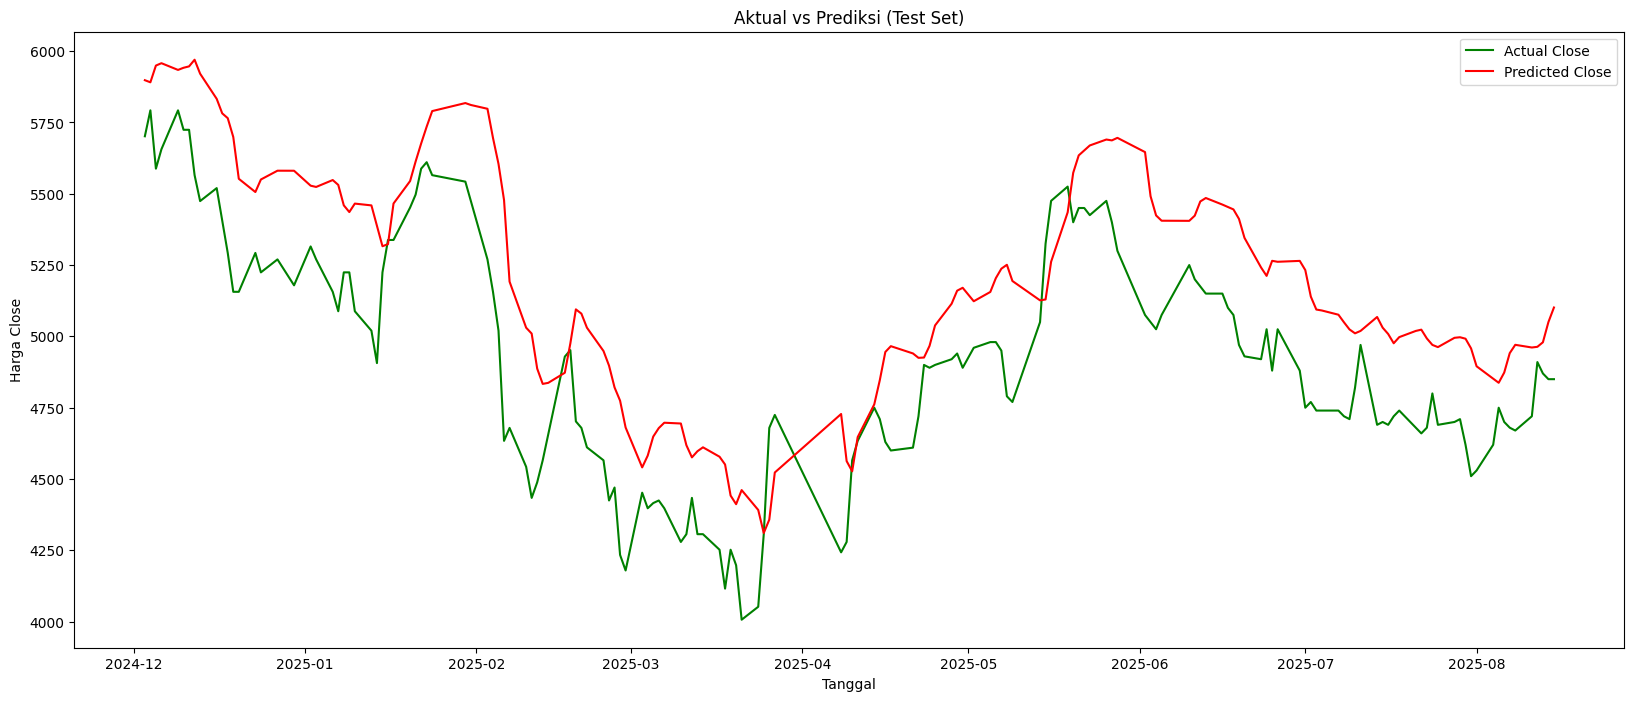

MSE  : 103222.5496
MAE  : 288.7757
MAPE : 102.85%


In [125]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ambil data actual test (Close dalam skala asli)
dummy_true = np.zeros((len(y_test), train_scaled.shape[1]))
dummy_true[:, 3] = y_test[:, 3]   # ambil hanya kolom Close
y_test_asli = scaler.inverse_transform(dummy_true)[:, 3]

# indeks tanggal untuk test set
test_index = data.index[train_size+seq_length:]  # sesuaikan dengan slicing kamu

y_pred_asli = test_preds_asli[:, 3]

plt.figure(figsize=(20,8))
plt.plot(test_index, y_test_asli, label="Actual Close", color='green')
plt.plot(test_index, y_pred_asli, label="Predicted Close", color='red')  # kolom Close
plt.legend()
plt.title("Aktual vs Prediksi (Test Set)")
plt.xlabel("Tanggal")
plt.ylabel("Harga Close")
plt.show()

mse = mean_squared_error(y_test_asli, y_pred_asli)

# MAE
mae = mean_absolute_error(y_test_asli, y_pred_asli)

# MAPE
mape = np.mean(np.abs((y_test_asli, y_pred_asli) / y_test_asli)) * 100

print(f"MSE  : {mse:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"MAPE : {mape:.2f}%")

#forecast

In [65]:
df = bmri.copy()
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

features = ['Open', 'High', 'Low', 'Close', 'Volume']
data = df[features].values

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [67]:
def predict_until(model, data_scaled, seq_length, scaler, last_date, end_date="2025-12-31"):
    model.eval()

    # pastikan end_date punya timezone yang sama dengan last_date
    if last_date.tz is not None:
        end_date = pd.Timestamp(end_date).tz_localize(last_date.tz)
    else:
        end_date = pd.Timestamp(end_date)

    # generate tanggal bursa (senin-jumat)
    future_dates = pd.bdate_range(start=last_date + pd.Timedelta(days=1), end=end_date, freq="C")

    predictions = []
    cur_seq = torch.tensor(data_scaled[-seq_length:], dtype=torch.float32).unsqueeze(0)  # (1, seq_len, 5)

    for _ in range(len(future_dates)):
        with torch.no_grad():
            pred = model(cur_seq)
            pred = pred.cpu().numpy()
            predictions.append(pred[0])

        # update sequence dengan prediksi baru
        new_row = torch.tensor(pred, dtype=torch.float32)  # (1, 5)
        new_row = new_row.unsqueeze(0)  # (1,1,5)
        cur_seq = torch.cat((cur_seq[:, 1:, :], new_row), dim=1)



    predictions = np.array(predictions)


    future_preds = scaler.inverse_transform(predictions)

    return future_dates, future_preds


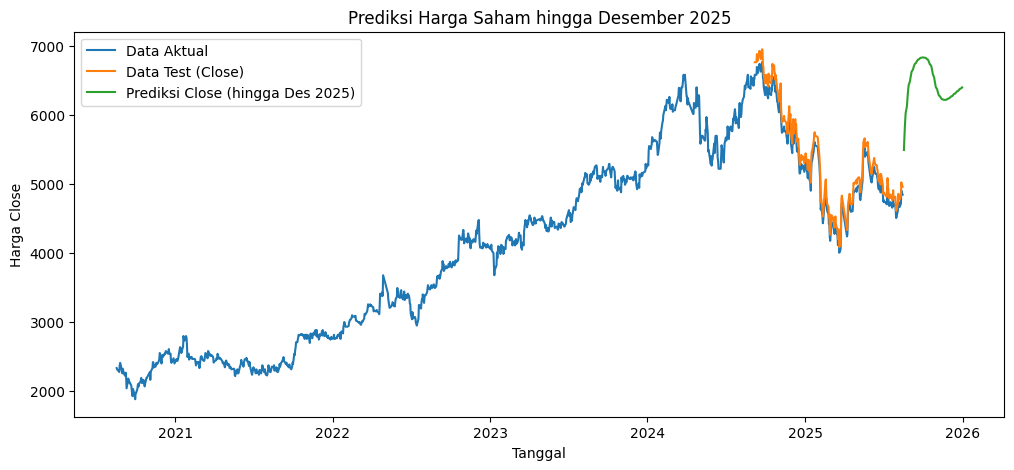

In [68]:
last_date = df.index[-1]
future_dates, future_preds = predict_until(model, data_scaled, seq_length=50, scaler=scaler, last_date=last_date)


dummy_true = np.zeros((len(y_test), train_scaled.shape[1]))
dummy_true[:, 3] = y_test[:, 3]   #  kolom 3 = Close
y_test_asli = scaler.inverse_transform(dummy_true)[:, 3]


test_index = df.index[train_size+seq_length:]

plt.figure(figsize=(12,5))
plt.plot(df.index, df['Close'], label="Data Aktual")
plt.plot(test_index, y_test_asli, label="Data Test (Close)")
plt.plot(future_dates, future_preds[:, 3], label="Prediksi Close (hingga Des 2025)")
plt.legend()
plt.xlabel("Tanggal")
plt.ylabel("Harga Close")
plt.title("Prediksi Harga Saham hingga Desember 2025")
plt.show()
